
# Temporal normalization

This example shows how to perform a temporal normalization of traces with
different methods. 


In [1]:
import matplotlib.pyplot as plt

import covseisnet as csn

## Read waveforms

This section reads an example stream of seismic data, which is shipped with
ObsPy. The stream contains three traces.



In [2]:
# Read the example stream (shipped with ObsPy)
stream = csn.read()

# Highpass filter the stream to better see the sync in high frequencies
stream.filter("highpass", freq=1.0)

# Print the original stream
print(stream)

3 Trace(s) in NetworkStream (synced):
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


----------------------

We here show the trace normalized with different methods. The methods are
applied to the stream, and the normalized traces are stored in a list. See\
:footcite:`bensen2007processing` for more information on the normalization



In [3]:
# Initialize the list of normalized streams
normalization_methods = ["onebit", "smooth"]
normalized_streams = []

# Normalize the stream with the different methods
for method in normalization_methods:
    normalized_stream = stream.copy()
    normalized_stream.time_normalize(method=method)
    normalized_streams.append(normalized_stream)

## Comparison

This section compares the original stream with the normalized streams. The
traces are plotted in a figure, where the original stream is plotted first,
and the normalized streams are plotted below.



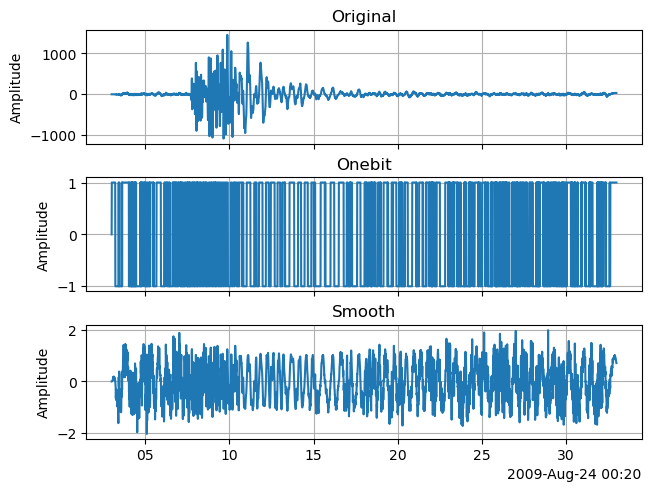

In [4]:
# Concatenate the original stream with the normalized streams
streams = [stream] + normalized_streams
labels = ["original"] + normalization_methods

# Create gigure
fig, axes = plt.subplots(len(streams), sharex=True, constrained_layout=True)

# Plot each case
for ax, stream, label in zip(axes, streams, labels):
    ax.plot(stream.times("matplotlib"), stream.traces[0].data)
    ax.set_title(label.title())
    ax.set_ylabel("Amplitude")
    ax.grid()

# Set the x-axis label
csn.plot.dateticks(axes[-1])

## References

.. footbibliography::

